In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
df = pd.read_csv('encoded.csv', index_col=0)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [4]:
df.date = pd.to_datetime(df.date)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


# Количество ДТП по годам

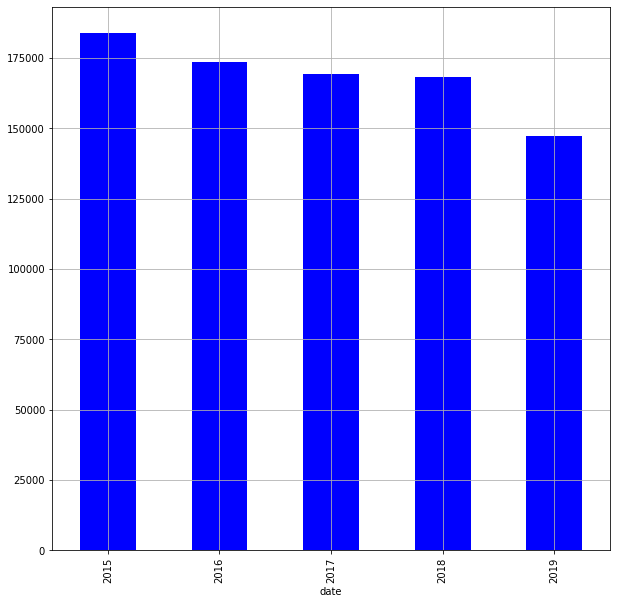

In [24]:
df.groupby(df['date'].dt.year).size().plot.bar(rot=90, grid=True, figsize =(10,10), color='blue')

Видно, что, начиная с 2015 года, ежегодное количество ДТП идет на спад. Причиной тому является количество дорожных работЮ улучшение качества дорожного покрытия, установка камер фиксации нарушение дорожного движения, знаков, ограничивающих маневры участников ДД. Дорожная инфраструктура улучшается. Ужесточаются меры по наказанию нарушителей ДД. 

# Количество ДТП по месяцам

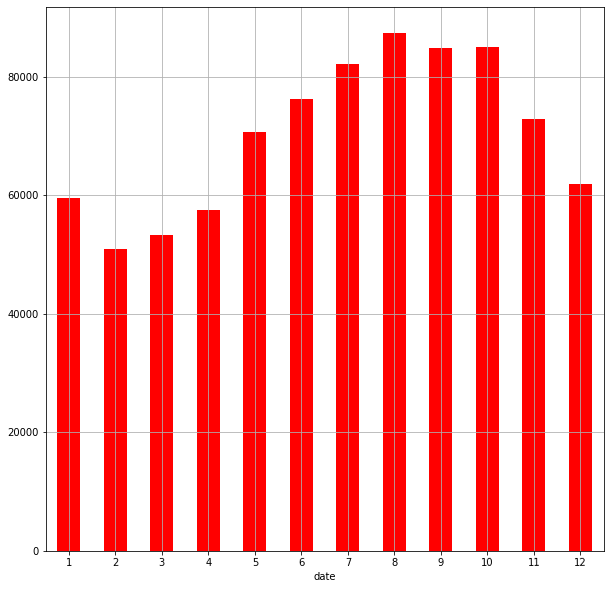

In [23]:
df.groupby(df['date'].dt.month).size().plot.bar(rot=1, grid=True, figsize =(10,10), color = 'red')

Пик количества ДТП в России выпадает на летний и осенний периоды. Это может быть обосновано климатическими условиями РФ, так как высокие температуры и наиболее приятные для отдыха условия выпадают на летний и осенний периоды. ДТП в осенний период также может быть обосновано тем, что не все водители заблаговременно переходят на сезонную резину, а климатические условия резко меняются.

# Количество ДТП по дням недели

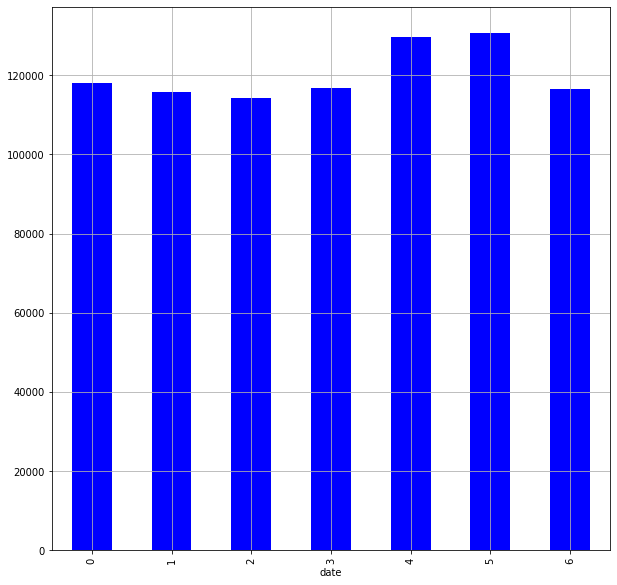

In [22]:
df.groupby(df['date'].dt.dayofweek).size().plot.bar(rot=90, grid=True,figsize =(10,10), color = 'blue')

Пиковые значения количества ДТП выпадают на такие дни недели, как пятница и суббота. Это связано с тем, что в выходные дни люди часто уезжают за город, превышают скоростной режим, стараясь побыстрее добраться до места отдыха. Большой трафик автомобилей, находящихся на трассах, а не в городских пробках.

# Количество ДТП по часам дня

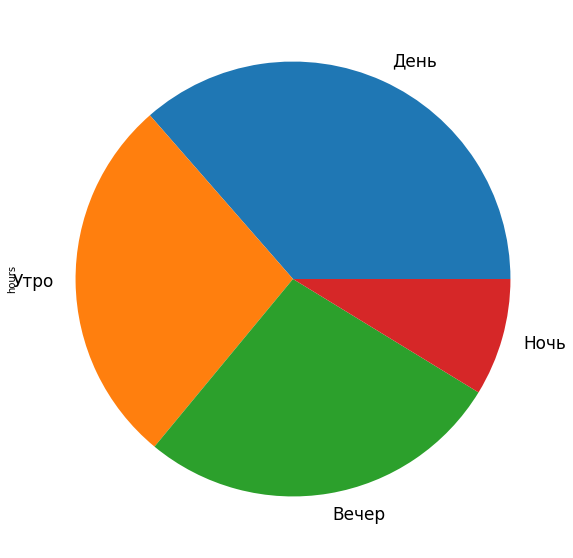

In [19]:
df.hours.value_counts().plot(kind='pie',fontsize=17, figsize =(10,10))


Большая часть ДТП происходит в раннее время - утро и днем. Ночью наименьшее количество ввиду низкого трафика автомобилей.

# Классификация состояний освещения при ДТП

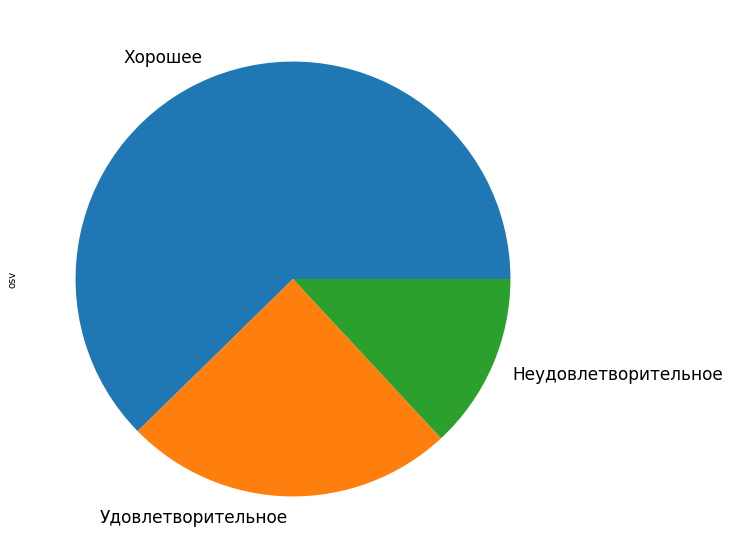

In [20]:
df.osv.value_counts().plot(kind='pie',fontsize=17, figsize =(10,10))

Большая часть ДТП совершается при хорошем освещении дорожного полотна.
Около четверти всех ДТП совершается при удовлетворительном состоянии дорожного полотна.
Можно сделать вывод о том, что параметр освещения не является одним из ключевых факторов ДТП.

# Классификация состояний дорожного полотна при ДТП

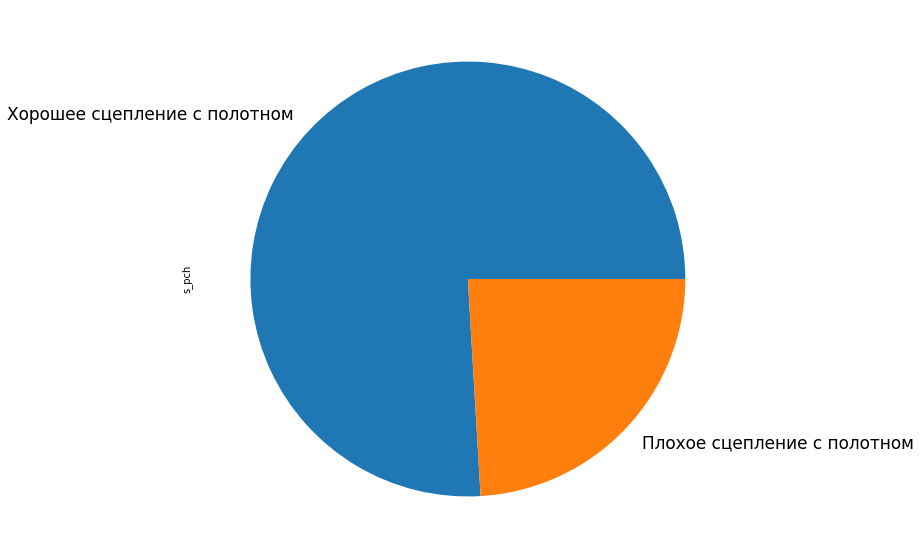

In [22]:
df.s_pch.value_counts().plot(kind='pie',fontsize=17, figsize =(10,10))

Качество сцепления автомобилей с дорожным полотном также не является ключевым фактором. Однако стоит заметить, что почти в 25% случаях ДТП происходят вследствие плохого сцепления с полотном. Возможно это связано с качеством резины автомобилей. Также одной из причин стоит отметить качество самого дорожного полотна или качества обработки полотна дорожными службами в опасных погодных условиях.

# Классификация режима движения

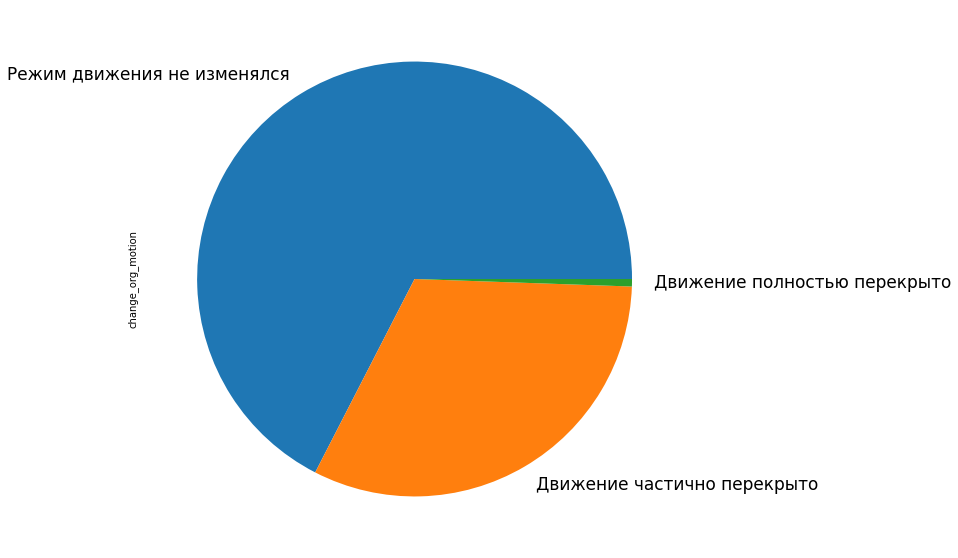

In [23]:
df.change_org_motion.value_counts().plot(kind='pie',fontsize=17, figsize =(10,10))

# Классификация погодных условий

In [25]:
df.loc[df['pogoda'].str.contains('Дождь|Снегопад|Метель|Туман|Ураганный ветер'), 'pogoda'] = 'Метеоусловия высокой степени сложности'
df.loc[df['pogoda'].str.contains('Пасмурно'), 'pogoda'] = 'Метеоусловия средней степени сложности'
df.loc[df['pogoda'].str.contains('Ясно'), 'pogoda'] = 'Метеоусловия низкой степени сложности'

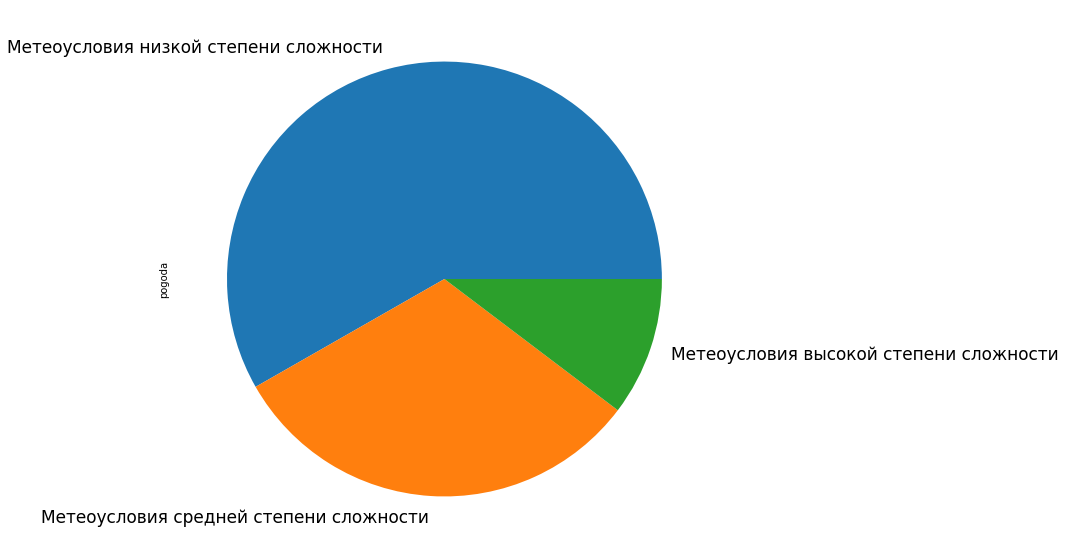

In [26]:
df.pogoda.value_counts().plot(kind='pie',fontsize=17, figsize =(10,10))

Чуть более 1/3 ДТП происходит в метеусловиях средней степени сложности. И почти 1/2 в метеусловиях средней и высокой степени сложности. Следует выделить такие факторы ДТП, как недостаток опыта водителя или же недостаточная квалификация, низкий уровень работы дорожных служб, а также сам человеческий фактор.

# Классификация последствий ДТП

In [27]:
df = df[df['posled'].notna()] # есть такое, как выясняется
df.loc[df['posled'].str.contains('Скончался'), 'posled'] = 'Тяжелые'
df.loc[df['posled'].str.contains('на стационарном лечении'), 'posled'] = 'Средние'

# все оставшиеся
df.loc[df['posled'].str.contains('к категории раненый не относится|необходимость амбулаторного лечения|Не пострадал'), 'posled'] = 'Легкие'

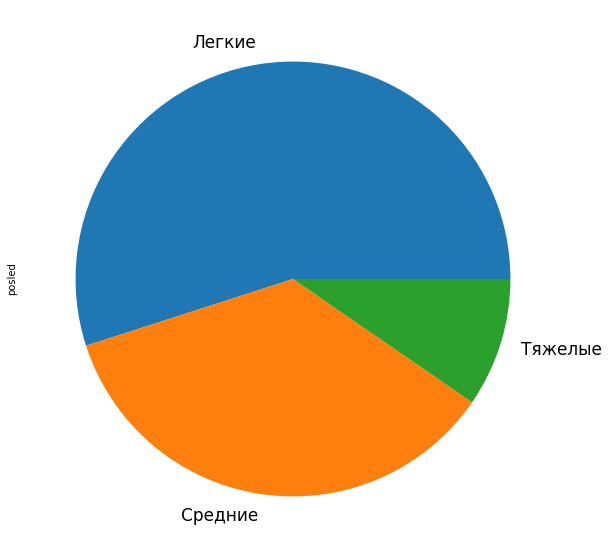

In [28]:
df.posled.value_counts().plot(kind='pie',fontsize=17, figsize =(10,10))

Почти половина всех ДТП заканчивается средними и тяжелыми последствиями. Причиной может служить качество самих автомобилей, их сборка, безопасность. Следует отметить, что причиной также может служить не использование ремня безопасности.

In [25]:
list(df.columns.values)

['date',
 'time',
 'district',
 'n_p',
 'dtp_v',
 's_pch',
 'osv',
 'change_org_motion',
 'woman_drv',
 'pogoda',
 'driver_narush',
 'alco',
 'posled',
 'sdor']

# Рассмотрим корреляцию дня недели и состояния алкогольного опьянения

In [30]:
agg_func_math = {
    'alco': ['sum']#, 'mean', 'median', 'min', 'max', 'std', 'var', 'mad']
}

In [34]:
dl = df.groupby(df['date'].dt.dayofweek).agg(agg_func_math)


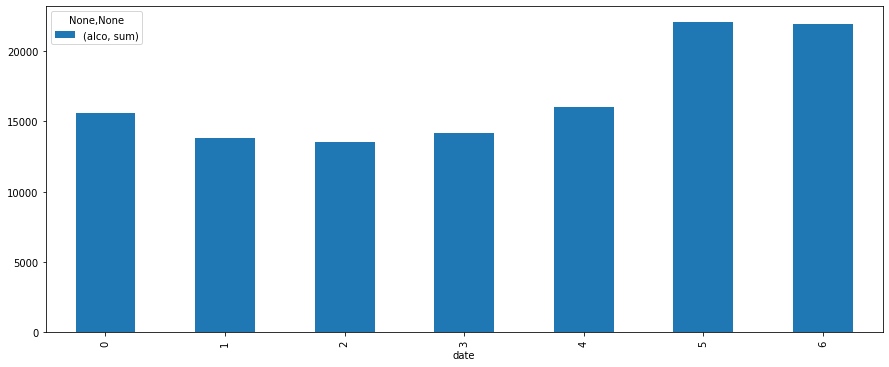

In [38]:
dl.plot.bar(figsize=(15, 6))

Большая часть ДТП в нетрезвом виде происходит в такие дни недели, как суббота и воскресенье. Обусловлено выходными днями, желанием людей отдохнуть и безответственным подходом к эксплуатации ТС.

# Рассмотрим корреляцию месяца года и алкогольного опьянения.

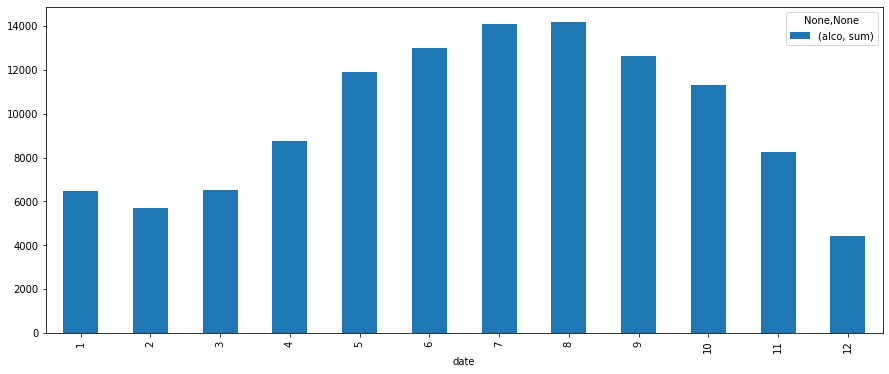

In [37]:
df.groupby(df['date'].dt.month).agg(agg_func_math).plot.bar(figsize=(15, 6))

Большая часть ДТП в нетрезвом виде отмечается на летний и осенний сезоны, как и в целом общее количество ДТП.